<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-multiclass-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(multiclass-classification)=
# Example: Multiclass Classification Problem

This example is taken from Section 4.2 of the book "Deep Learning with Python" by François Chollet.

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. 

## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

`train_data` and `test_data`: lists of news stories, each story being a list of word indices (encoding a sequence of words).

`train_labels` and `test_labels`: The label associated with an example is an integer between 0 and 45—a topic index.

In [2]:
story_idx = 100
print(train_data[story_idx])
print(train_labels[story_idx])

[1, 367, 1394, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 3006, 293, 484, 2, 1440, 5825, 8, 145, 7, 10, 1670, 6, 10, 294, 517, 237, 2, 367, 8042, 7, 2477, 1177, 483, 1440, 5825, 8, 367, 1394, 4, 169, 387, 66, 209, 30, 2344, 652, 1496, 9, 209, 30, 2564, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 1457, 24, 1345, 5, 4, 196, 150, 10, 523, 320, 64, 992, 6373, 13, 367, 190, 297, 64, 85, 1692, 6, 8656, 122, 9, 36, 1457, 24, 269, 4753, 27, 367, 212, 114, 45, 30, 3292, 7, 126, 2203, 13, 367, 6, 1818, 4, 169, 65, 96, 28, 432, 23, 189, 1254, 4, 9725, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 9953, 2016, 6373, 7, 2, 122, 1440, 5825, 8, 269, 4753, 1217, 7, 608, 2203, 30, 3292, 1440, 5825, 8, 43, 339, 43, 231, 9, 667, 1820, 126, 212, 4197, 21, 1709, 249, 311, 13, 260, 489, 9, 65, 4753, 64, 1209, 4397, 249, 954, 36, 152, 1440, 5825, 506, 24, 135, 367, 311, 34, 420, 4, 8407, 200, 1519, 13, 137, 730, 190, 7, 104, 570, 52, 64, 2492, 7725, 4, 642, 5, 405, 7725, 249

The `reuters` object has a method `get_word_index` that returns a dictionary mapping words to an integer index.

In [3]:
news_idx = 0

word_index = reuters.get_word_index() 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[news_idx]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# the words indices range from 1 to 9999
print(min(min(seq) for seq in train_data))
print(max(max(seq) for seq in train_data))

print(reverse_word_index[1])
print(word_index["the"])


1
9999
the
1


## Step 2: Preprocess the data

In this step, we will convert the lists of integers into tensors that our neural network can process. 

We will implement **multi-hot-encoding** - a binary representation commonly used in NLP - to transform our lists into vectors of 0s and 1s. Each resulting tensor will be a 10,000-element vector where:

* 1 indicates the word appears in the review
* 0 indicates the word is absent

This representation creates a standardized format that our model can efficiently process while preserving the essential information about word presence in each review.



In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:  
            results[i, j] = 1.
    return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)



In [6]:

# check that the vectorized data is correct
for i in train_data[0]: 
    if x_train[0, i] != 1.0: 
        print(f"i={i} x_train[0, {i}]={x_train[0, i]}")

# test your understanding: why are these values not the same? 
print(sum(x_train[0]))
print(len(train_data[0]))


57.0
87


In [7]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels): 
        results[i, label] = 1.
        
    return results 
    
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [9]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


In [10]:
# Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(train_labels) 
y_test = to_categorical(test_labels)

In [11]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


## Step 3: Build the model

### Softmax

Given a vector of raw predictions (logits) $z = (z_1, z_2, \dots, z_n)$, the softmax function $\sigma(z)$ is defined as:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where:

* $\sigma(z)_i$ is the predicted probability for the $i^{\text{th}}$ class.
* The probabilities satisfy $\sum_{i=1}^{n} \sigma(z)_i = 1$.


In [12]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z)   
    return exp_z / np.sum(exp_z)

# Example usage:
logits = np.array([-20.0, -1.0, -1.1])
probabilities = softmax(logits)
print(probabilities)   
print(np.sum(probabilities))  # the sum of the probabilities should be 1

[2.94135151e-09 5.24979186e-01 4.75020811e-01]
1.0


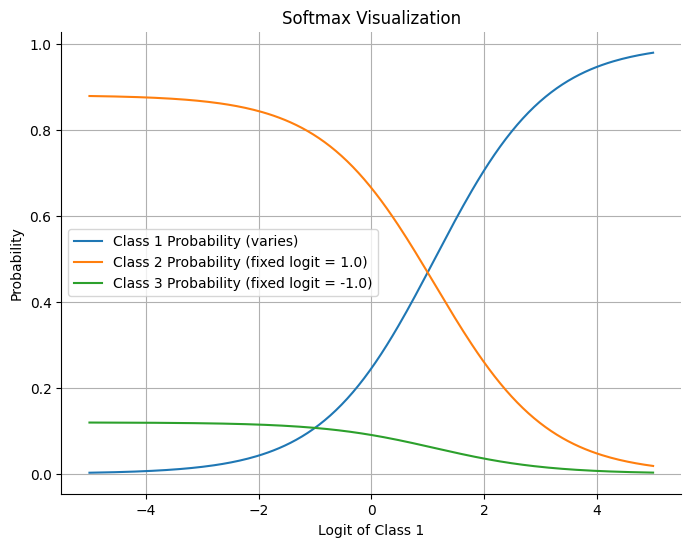

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Varying the logit of class 1, fix logits for class 2 and class 3 at distinct values
logits_class1 = np.linspace(-5, 5, 200)
fixed_logit_class2 = 1.0  
fixed_logit_class3 = -1.0 

probabilities = np.array([
    softmax([z, fixed_logit_class2, fixed_logit_class3]) 
    for z in logits_class1
])

plt.figure(figsize=(8, 6))
plt.plot(logits_class1, probabilities[:, 0], label='Class 1 Probability (varies)')
plt.plot(logits_class1, probabilities[:, 1], label=f'Class 2 Probability (fixed logit = {fixed_logit_class2})')
plt.plot(logits_class1, probabilities[:, 2], label=f'Class 3 Probability (fixed logit = {fixed_logit_class3})')

plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Visualization")
plt.grid(True)
sns.despine()
plt.legend()
plt.show()


### Categorical Crossentropy

Categorical cross-entropy is a loss function commonly used to train neural networks for multi-class classification problems, where each instance belongs to exactly one category.

Intuition: It measures how far away your model's predicted probabilities are from the true labels. A smaller loss means your model's predictions are close to the true labels, while a larger loss means predictions are far away.

Given:

* True labels: $y = (y_1, y_2, \dots, y_n)$, represented as a one-hot vector, where exactly one element is $1$ (the true class), and all others are $0$.
* Predicted probabilities: $\hat{y} = (\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n)$, output by the softmax function.
 
The categorical cross-entropy loss is:

$$
\text{Loss} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

Since only the true class label $y_i = 1$ contributes, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{\text{true class}})
$$


In [14]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Ensure numerical stability by adding a tiny epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example usage:
y_true = np.array([0, 0.5, 0.5])   
y_pred = np.array([0.0, 1.0, 0.0])  
loss = categorical_crossentropy(y_true, y_pred)
print(loss)   


17.269388197455342


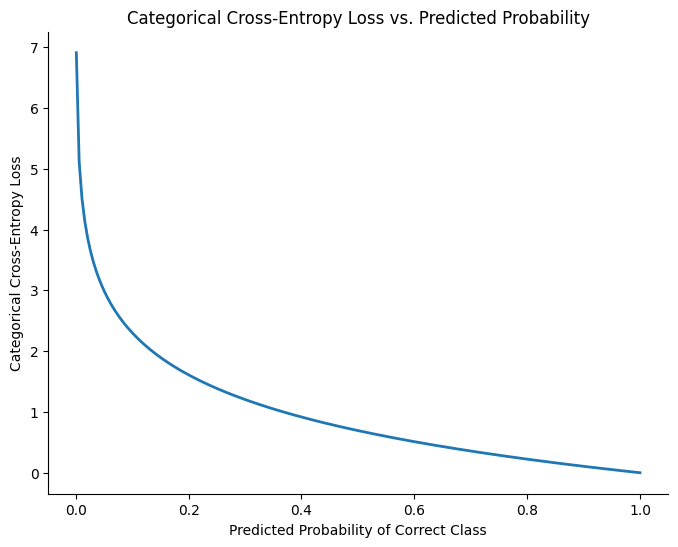

In [15]:

prob_correct = np.linspace(0.001, 1.0, 200)

loss_values = []
for p in prob_correct:
    y_true = np.array([1, 0, 0])            # True class is class 1
    y_pred = np.array([p, (1 - p)/2, (1 - p)/2])  # Remaining probability split evenly
    loss = categorical_crossentropy(y_true, y_pred)
    loss_values.append(loss)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_correct, loss_values, label='Cross-Entropy Loss', linewidth=2)

plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.title('Categorical Cross-Entropy Loss vs. Predicted Probability')
plt.grid(False)
sns.despine()
plt.show()


### Defining the Model

In [16]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Step 4: Train the model


In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will train the model for 20 epochs in mini-batches of 512 samples.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.0020 - loss: 3.8404

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2459 - loss: 3.5567  

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3261 - loss: 3.2863 - val_accuracy: 0.6130 - val_loss: 1.9829


Epoch 2/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6445 - loss: 1.9619

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6541 - loss: 1.8117 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6597 - loss: 1.7582 - val_accuracy: 0.6780 - val_loss: 1.4320


Epoch 3/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7188 - loss: 1.4070

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - loss: 1.3025 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 1.2837 - val_accuracy: 0.7170 - val_loss: 1.2272


Epoch 4/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7227 - loss: 1.2029

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7673 - loss: 1.0474 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7724 - loss: 1.0297 - val_accuracy: 0.7700 - val_loss: 1.0943


Epoch 5/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8457 - loss: 0.7708

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8158 - loss: 0.8504 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8166 - loss: 0.8429 - val_accuracy: 0.7810 - val_loss: 1.0280


Epoch 6/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8379 - loss: 0.6870

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8435 - loss: 0.7045 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8471 - loss: 0.7023 - val_accuracy: 0.7990 - val_loss: 0.9501


Epoch 7/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8574 - loss: 0.6401

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.6036 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8723 - loss: 0.5949 - val_accuracy: 0.8080 - val_loss: 0.9189


Epoch 8/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9043 - loss: 0.4969

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9010 - loss: 0.4961 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9002 - loss: 0.4937 - val_accuracy: 0.8090 - val_loss: 0.8899


Epoch 9/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9082 - loss: 0.4242

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9171 - loss: 0.4096 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9168 - loss: 0.4099 - val_accuracy: 0.8160 - val_loss: 0.8793


Epoch 10/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9434 - loss: 0.3441

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9324 - loss: 0.3497 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9307 - loss: 0.3495 - val_accuracy: 0.8080 - val_loss: 0.9116


Epoch 11/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9219 - loss: 0.3419

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9378 - loss: 0.3018 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9378 - loss: 0.3005 - val_accuracy: 0.8170 - val_loss: 0.8850


Epoch 12/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9707 - loss: 0.2053

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9478 - loss: 0.2470 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9451 - loss: 0.2534 - val_accuracy: 0.8210 - val_loss: 0.8804


Epoch 13/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9570 - loss: 0.1971

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9485 - loss: 0.2199 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9471 - loss: 0.2237 - val_accuracy: 0.8240 - val_loss: 0.8742


Epoch 14/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9551 - loss: 0.1939

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9533 - loss: 0.1978 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9526 - loss: 0.1988 - val_accuracy: 0.8240 - val_loss: 0.8846


Epoch 15/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9590 - loss: 0.2006

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.1789 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9575 - loss: 0.1810 - val_accuracy: 0.8310 - val_loss: 0.8998


Epoch 16/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9551 - loss: 0.1570

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9576 - loss: 0.1596 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9562 - loss: 0.1644 - val_accuracy: 0.8090 - val_loss: 0.9442


Epoch 17/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9648 - loss: 0.1279

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9633 - loss: 0.1430 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9610 - loss: 0.1472 - val_accuracy: 0.8220 - val_loss: 0.9398


Epoch 18/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1440

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9647 - loss: 0.1396 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9614 - loss: 0.1432 - val_accuracy: 0.8130 - val_loss: 0.9361


Epoch 19/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9590 - loss: 0.1470

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9616 - loss: 0.1295 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9592 - loss: 0.1341 - val_accuracy: 0.8210 - val_loss: 0.9252


Epoch 20/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9590 - loss: 0.1236

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.1198 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9591 - loss: 0.1243 - val_accuracy: 0.8130 - val_loss: 0.9513


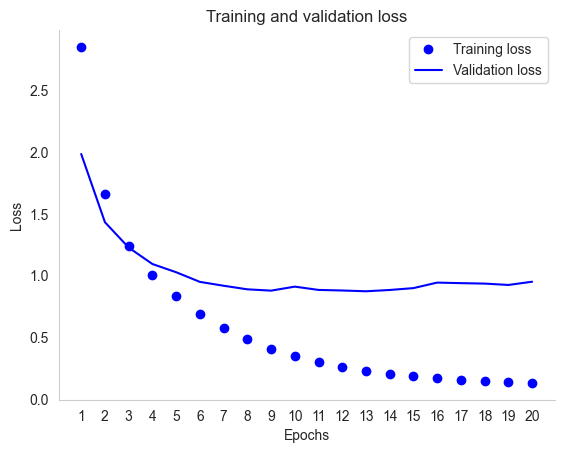

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

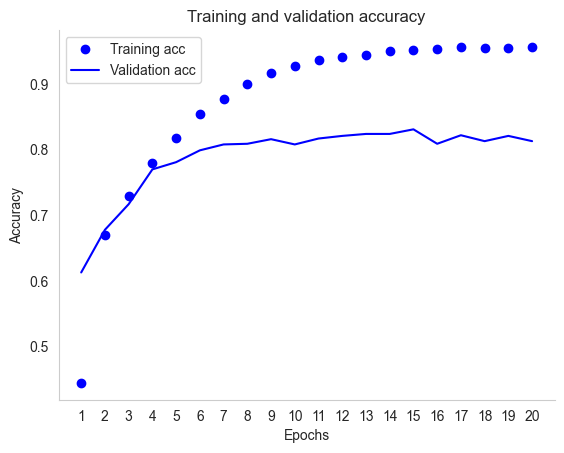

In [20]:
acc = history_dict["accuracy"]

val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [21]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")


Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.0078 - loss: 3.8492

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3272 - loss: 3.4678  

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4143 - loss: 3.1509


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6484 - loss: 1.7142

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6739 - loss: 1.6465 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6823 - loss: 1.5765


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7266 - loss: 1.2203

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7454 - loss: 1.1665 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7511 - loss: 1.1425


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8027 - loss: 0.9309

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8027 - loss: 0.9112 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8043 - loss: 0.9044


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8301 - loss: 0.7828

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8386 - loss: 0.7415 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8371 - loss: 0.7446


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8438 - loss: 0.7245

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8548 - loss: 0.6683 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8597 - loss: 0.6480


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8965 - loss: 0.5089

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8916 - loss: 0.5254 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8922 - loss: 0.5190


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9043 - loss: 0.4327

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9090 - loss: 0.4178 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9093 - loss: 0.4229

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9092 - loss: 0.4234


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9297 - loss: 0.3168

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9325 - loss: 0.3249 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9280 - loss: 0.3413


 1/71 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8750 - loss: 0.5733

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8016 - loss: 0.8915


The test loss is 0.9192442297935486
The test accuracy is 0.7934104800224304


### Prediction  

In [22]:
predictions = model.predict(x_test[0:5])

story_idx = 4
# Each entry in “predictions” is a vector of length 46:
print(predictions[story_idx].shape)

print(predictions[story_idx])
# The coefficients in this vector sum to 1, as they form a probability distribution:
print(np.sum(predictions[story_idx]))

# The largest entry is the predicted class—the class with the highest probability:
print(np.argmax(predictions[story_idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(46,)
[8.5291418e-04 2.5312149e-03 1.2951369e-03 1.1208977e-04 6.2455521e-03
 4.4090621e-04 1.6610493e-03 1.3737344e-05 7.1343611e-04 2.7227830e-04
 2.2241056e-03 6.9933455e-04 1.5282322e-03 9.3652910e-01 2.0249949e-04
 2.2446106e-03 2.5426738e-02 3.3118527e-03 1.8636617e-03 7.3574967e-04
 1.3986805e-03 5.7395676e-04 6.6499657e-04 1.2439266e-03 4.5041685e-04
 5.8023608e-04 3.7590513e-04 5.2396499e-04 2.6854983e-04 1.1085871e-04
 5.4805925e-05 2.0698101e-04 4.1050249e-04 2.1986521e-04 3.7696402e-04
 1.4570283e-04 9.4375013e-05 3.7722042e-04 1.1223096e-04 1.0280920e-03
 3.5174575e-04 4.6821893e-04 7.0791453e-04 5.0111004e-05 4.4054261e-05
 2.5555430e-04]
0.99999994
13


Some things to try: 

* Check the accuracy of a purely random classifier
* Try using different optimizers: `adam` or `sgd`
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* True using a single intermediate layer, or three intermediate layers.



In [23]:
model = keras.Sequential([
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
print(model.predict(x_test))

Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.0059 - loss: 3.8285

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1318 - loss: 3.8127  


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0391 - loss: 3.7586

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0462 - loss: 3.7397 


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0352 - loss: 3.6649

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0461 - loss: 3.6401 


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0449 - loss: 3.5648

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0485 - loss: 3.5178 


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0586 - loss: 3.4163

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0526 - loss: 3.3790 


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0547 - loss: 3.2387

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0532 - loss: 3.2227 


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1113 - loss: 3.1074

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2119 - loss: 3.0657 


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3125 - loss: 3.0335

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3519 - loss: 2.9107 


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3906 - loss: 2.6743

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3669 - loss: 2.6878 


 1/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4688 - loss: 2.3532

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.3787 - loss: 2.6072


The test loss is 2.62481951713562
The test accuracy is 0.37488868832588196
The predictions are:


 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


[[5.5247743e-04 4.0461324e-02 6.8318904e-03 ... 1.0303980e-02
  5.6636738e-05 3.0215302e-02]
 [6.3383453e-02 5.2926526e-03 1.3662228e-02 ... 8.7302708e-04
  2.7063321e-03 4.5109529e-02]
 [1.1544082e-02 4.1837484e-02 2.1081993e-02 ... 1.7668644e-02
  3.3547634e-03 3.8680404e-02]
 ...
 [3.4527895e-03 5.1068708e-02 1.5840393e-02 ... 2.1052724e-02
  9.7837241e-04 3.7400365e-02]
 [2.6083591e-03 5.0601166e-02 1.4175203e-02 ... 1.9319082e-02
  6.2894728e-04 3.7116006e-02]
 [5.2563716e-03 4.7630604e-02 1.6299916e-02 ... 1.6079873e-02
  9.3677029e-04 3.9188962e-02]]
